# Social Data Analysis Report 

by Guangxue Wen (GUW16)

### Credit: 

I wrote [a python crawler](fetch_data.ipynb) to access Wiki Articles, and I used the data to [explore the data a little bit](analysis_explore.ipynb) before I start this report.

Within this notebook, [Ainur's data](https://github.com/abaikara/social_computing_analysis-) is applied. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
articles_good = pd.read_csv("data/ainur/article_good.csv")
articles_nsgood = pd.read_csv("data/ainur/article_bad.csv")

In [3]:
type(articles_good)

pandas.core.frame.DataFrame

In [4]:
articles_good.head()

,Unnamed: 0,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


# Aspect 1: Total number of unique editors

### My Hypothesis: 

**Good** articles have more diverse numbers of unique editors than the **not-so-good** articles

In [5]:
pd.DataFrame(articles_good.groupby('Article').agg('user').unique()).head()

,user
Article,
4chan,"[Certes, 2600:8801:983:7000:21D4:4DD3:80E2:3E6..."
AACS encryption key controversy,"[2409:4062:209D:1376:A498:A3DA:38DA:55E9, Aoi,..."
AVG PC TuneUp,"[Certes, 2405:205:3202:4746:B8B7:A4C9:4E96:F74..."
Acid2,"[ClueBot NG, 190.43.57.117, 125.63.26.99, Just..."
Alan Kotok,"[Plaba123, 99.85.40.29, Certes, ClueBot NG, Ma..."


In [6]:
series_n_contributer = articles_good.groupby('Article').agg({'user': ['nunique']})
s_nsgood = articles_nsgood.groupby('Article').agg({'user': ['nunique']})

print('number of contributors description:\nGood\t|\tNot-So-Good')
pd.concat([series_n_contributer.describe(), s_nsgood.describe()], axis=1)

number of contributors description:
Good	|	Not-So-Good


user            
           nunique     nunique
count   152.000000  250.000000
mean    148.223684   93.548000
std     376.060623   26.368254
min       4.000000   67.000000
25%      13.000000   82.000000
50%      46.000000   90.000000
75%      99.000000   98.000000
max    2817.000000  385.000000

## Find outliners

### For Good Articles:

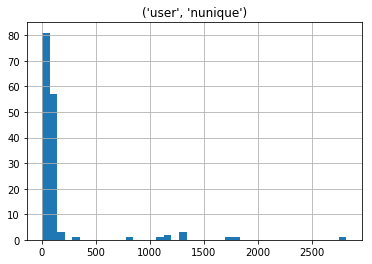

In [7]:
# Check the histogram first... if there's any suspcious stuff
_=series_n_contributer.hist(bins=40)

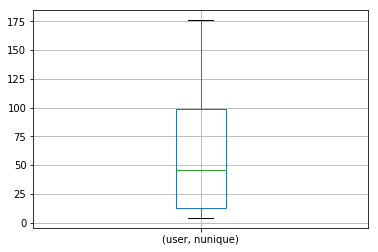

In [8]:
_=series_n_contributer.boxplot(showfliers=False)

By looking at the boxplot, we treat n_contributer over 175 as outliners:

In [9]:
task1_good = pd.Series(articles_good.groupby('Article').agg('user').describe()['unique'])
outliners = task1_good[ task1_good>175 ]
print(outliners.sort_values()[::-1].head())
outliners.describe()

# articles_good.groupby('Article').agg('user').describe()['unique'].sort_values()[::-1].head(15)

Article
Manchester Baby       2817
Parallel computing    1824
NeXT                  1727
Folding@home          1332
Delrina               1294
Name: unique, dtype: object


count       12
unique      12
top       1167
freq         1
Name: unique, dtype: int64

### Let's compare with the not-so-good one

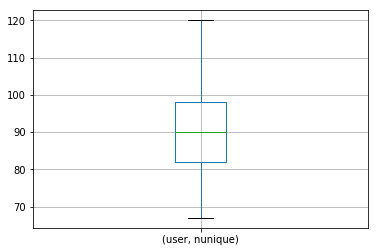

In [10]:
_=s_nsgood.boxplot(showfliers=False)

By looking at the boxplot, we treat n_contributer of not-so-good articles over 120 as outliners:

In [11]:
task1_nsgood = pd.Series(articles_nsgood.groupby('Article').agg('user').describe()['unique'])
outliners = task1_nsgood[ task1_nsgood>120 ]
print(outliners.sort_values()[::-1].head())
outliners.describe()

Article
Digital signal                 385
Natural language processing    244
Free software                  188
Outline of computing           187
Aakash (tablet)                167
Name: unique, dtype: object


count       8
unique      8
top       159
freq        1
Name: unique, dtype: int64

## Compare the boxplots together

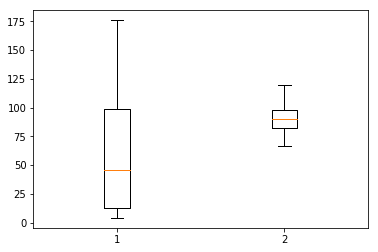

In [12]:
g = pd.Series(articles_good.groupby('Article').agg('user').describe()['unique'])
nsg = pd.Series(articles_nsgood.groupby('Article').agg('user').describe()['unique'])

_=plt.boxplot([g, nsg], showfliers=False)

## Conclution:

The comparison of boxplots across two groups concludes that my hypothesis that 
`Good articles have more diverse numbers of unique editors than the not-so-good articles` is valid.

The outliners of Good article group are `Manchester Baby`, `Parallel computing`, `NeXT` and etc, which are very popular topics,
while the Not-So-Good article group are `Digital signal`, `Natural language processing`, `Outline of computing` and etc.

# Aspect 2: Number of edits per editors

## My Hypothesis: 

**Good** articles have higher numbers of edits per editors than the **not-so-good** articles

    The editors comes back frequently to improve the articles and thus makes the article better.
    


## Edits per editor description:

In [13]:
task2_good = articles_good.groupby(['Article', 'user']).agg('rev_id').count()
task2_nsgood = articles_nsgood.groupby(['Article', 'user']).agg('rev_id').count()

print('Edits per editor description:\nGood\t|\tNot-So-Good')
pd.concat([task2_good.describe(), task2_nsgood.describe()], axis=1)

Edits per editor description:
Good	|	Not-So-Good


,rev_id,rev_id
count,22530.000000,23387.000000
mean,1.738304,1.807457
std,3.230359,1.980297
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,162.000000,44.000000


## Find outliners

###  • Good Group

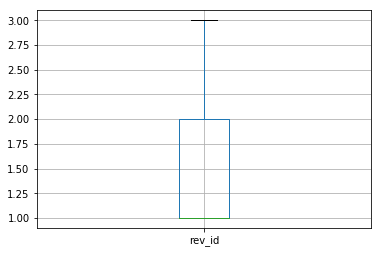

In [14]:
_=pd.DataFrame(task2_good).boxplot(showfliers=False)

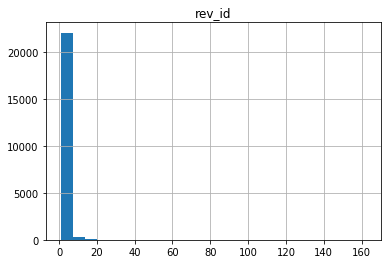

In [15]:
_=pd.DataFrame(task2_good).hist(bins=25)

By looking at the boxplot and the histogram, we treat counts of good articles over `3` as outliners:

In [16]:
outliners = task2_good[ task2_good>3 ]
print('Proportion of outliner', outliners.count() / task2_good.count())
outliners.describe()

Proportion of outliner 0.07043941411451399


count    1587.000000
mean        7.953371
std        10.130876
min         4.000000
25%         4.000000
50%         5.000000
75%         8.000000
max       162.000000
Name: rev_id, dtype: float64

In [17]:
# What are these outliners in good articles
print(outliners.sort_values()[::-1].head())
outliners.describe()

Article                        user        
Manchester Baby                Arthur Rubin    162
NeXT                           Arthur Rubin    125
Microsoft Security Essentials  Arthur Rubin    106
Folding@home                   Arthur Rubin    100
Manchester Baby                ClueBot NG       94
Name: rev_id, dtype: int64


count    1587.000000
mean        7.953371
std        10.130876
min         4.000000
25%         4.000000
50%         5.000000
75%         8.000000
max       162.000000
Name: rev_id, dtype: float64

### • Not-So-Good Group

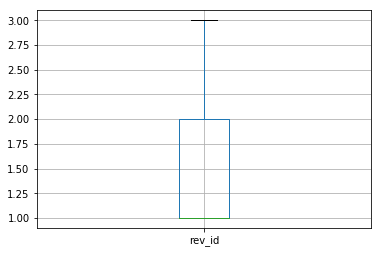

In [18]:
_=pd.DataFrame(task2_nsgood).boxplot(showfliers=False)

By looking at the boxplot and the histogram, we also treat counts of **not-so-good** articles over `3` as outliners:

In [19]:
outliners = task2_nsgood[ task2_nsgood>3 ]
print('Proportion of outliner:', outliners.count() / task2_nsgood.count())
outliners.describe()

Proportion of outliner: 0.08564587163808954


count    2003.00000
mean        7.05991
std         3.39542
min         4.00000
25%         4.00000
50%         6.00000
75%         9.00000
max        44.00000
Name: rev_id, dtype: float64

In [20]:
# What are these outliners in not-so-good articles, let's see
print(outliners.sort_values()[::-1].head())
outliners.describe()

Article                      user       
Digital signal               Ludde23        44
Natural language processing  ClueBot NG     38
Memory management            Chris_mahan    38
Comptometer                  Peters01       23
Nomogram                     Peters01       21
Name: rev_id, dtype: int64


count    2003.00000
mean        7.05991
std         3.39542
min         4.00000
25%         4.00000
50%         6.00000
75%         9.00000
max        44.00000
Name: rev_id, dtype: float64

## Compare the boxplots together

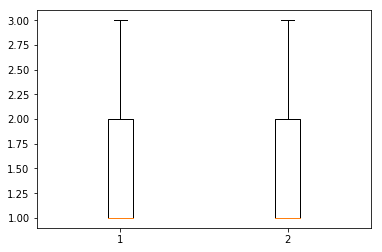

In [21]:
# Boxplot without fliers
_=plt.boxplot([task2_good, task2_nsgood], showfliers=False)

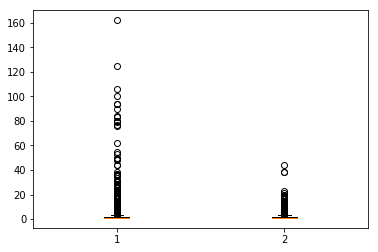

In [22]:
# Boxplot with fliers
_=plt.boxplot([task2_good, task2_nsgood])

## Conclusions:

As [the data description of two the groups](#Edits-per-editor-description:) shows, 

 - The mean of the two is quite similar
 
 - The standard deviation of `Good` group is slightly larger than the `Not-so-good` group
 
By looking at the boxplots comparison, the two groups have the same distribution in majority (without taking outliners into consideration), but the `Good` group has a larger range of outliners.

My hypothesis of "`Good articles have higher numbers of edits per editors than the not-so-good articles`" can not be valid. The numbers of edits per editors shows no strong relation to the article qualities.

# Aspect 3: Number of talk-page posts

## My Hypothesis: 

Number of talk-page posts have no relation to **Good** or **not-so-good** articles


In [23]:
# Load Talk dataset
articlestalk_good = pd.read_csv("data/ainur/talk_good.csv")
articlestalk_nsgood = pd.read_csv("data/ainur/talk_bad.csv")

In [24]:
articlestalk_good.head()

,Unnamed: 0,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,0,Parallel computing,850357480,22173,WOSlinker,2018-07-15T11:19:09Z,FA,Good
1,1,Parallel computing,844288857,22173,Arthur Rubin (alternate),2018-06-03T23:33:14Z,FA,Good
2,2,Parallel computing,807179335,22173,Arkansalty,2017-10-26T11:59:51Z,FA,Good
3,3,Parallel computing,791405619,22173,JFG,2017-07-20T01:58:52Z,FA,Good
4,4,Parallel computing,791405528,22173,JFG,2017-07-20T01:58:00Z,FA,Good


In [25]:
task3_good = articlestalk_good.groupby('Article').agg('page_id').count()
task3_nsgood = articlestalk_nsgood.groupby('Article').agg('page_id').count()

print('Number of talk-page posts description:\nGood\t|\tNot-So-Good')
pd.concat([task3_good.describe(), task3_nsgood.describe()], axis=1)

Number of talk-page posts description:
Good	|	Not-So-Good


,page_id,page_id
count,152.000000,250.000000
mean,10.769737,2.860000
std,35.204318,2.976548
min,2.000000,1.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,265.000000,36.000000


## Outliners

### Group Good

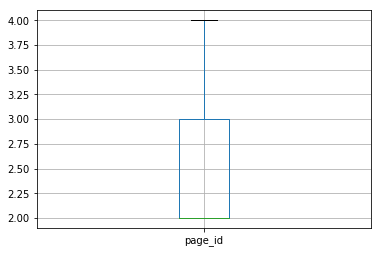

In [26]:
_=pd.DataFrame(task3_good).boxplot(showfliers=False)

In [27]:
# We treat n>4 as outliners:

outliners = task3_good[ task3_good>4 ]
print('Proportion of outliner:', outliners.count() / task3_good.count())
outliners.describe()

Proportion of outliner: 0.19078947368421054


count     29.000000
mean      46.586207
std       70.994224
min        5.000000
25%        6.000000
50%        8.000000
75%       63.000000
max      265.000000
Name: page_id, dtype: float64

In [28]:
# What are these outliners in good articles
outliners.sort_values()[::-1].head()

Article
Parallel computing    265
Manchester Baby       227
NeXT                  197
Manchester Mark 1     124
Delrina                90
Name: page_id, dtype: int64

### Group not-so-good

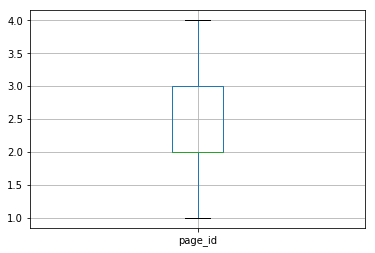

In [29]:
_=pd.DataFrame(task3_nsgood).boxplot(showfliers=False)

In [30]:
# We also treat n>4 as outliners of group not-so-good articles:

outliners = task3_nsgood[ task3_nsgood>4 ]
print('Proportion of outliner:', outliners.count() / task3_nsgood.count())
outliners.describe()

Proportion of outliner: 0.112


count    28.000000
mean      8.428571
std       6.414270
min       5.000000
25%       5.000000
50%       6.000000
75%       8.000000
max      36.000000
Name: page_id, dtype: float64

In [31]:
# What are these outliners in not-so-good articles
outliners.sort_values()[::-1].head()

Article
Digital signal                 36
Free software                  18
Cut, copy, and paste           14
User interface                 13
Natural language processing    13
Name: page_id, dtype: int64

## Compare the boxplots together

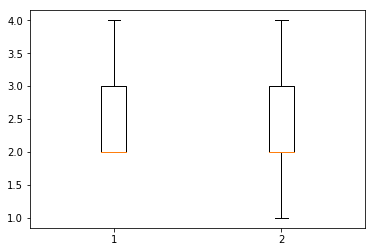

In [32]:
_=plt.boxplot([task3_good, task3_nsgood], showfliers=False)

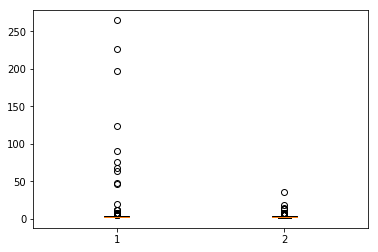

In [33]:
_=plt.boxplot([task3_good, task3_nsgood], showfliers=True)

## Conclusion:

Group of `good` article actually have more posts than the other group, which invalids my original hypothesis that 
`Number of talk-page posts have no relation to Good or not-so-good articles`.

The outliners of both groups are articles in popular topics (e.g. "Parallel computing", "Manchester Baby" and "Digital signal").

# Aspect 4: Number of editors posting on talk-pages

## My Hypothesis: 

**Good** articles have more editors posting on talk-pages than the **not-so-good** group articles


### Number of editors posting on talk-pages description:

In [34]:
task4_good = articlestalk_good.groupby(['Article']).agg({'user': ['nunique']})
task4_nsgood = articlestalk_nsgood.groupby(['Article']).agg({'user': ['nunique']})

print('Number of editors posting on talk-pages description:\nGood\t|\tNot-So-Good')
pd.concat([task4_good.describe(), task4_nsgood.describe()], axis=1)

Number of editors posting on talk-pages description:
Good	|	Not-So-Good


user            
          nunique     nunique
count  152.000000  250.000000
mean     7.197368    2.600000
std     18.333207    1.825742
min      2.000000    1.000000
25%      2.000000    2.000000
50%      2.000000    2.000000
75%      3.000000    3.000000
max    128.000000   19.000000

## Outliners

### Group Good

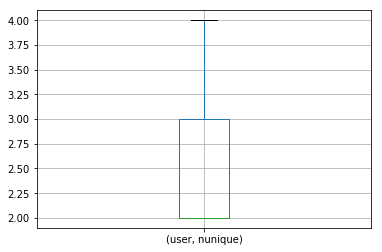

In [35]:
_=pd.DataFrame(task4_good).boxplot(showfliers=False)

In [36]:
# We treat n>4 as outliners:

outliners = task4_good[ task4_good>4 ]
print('Proportion of outliner:', outliners.count() / task4_good.count())
outliners.describe()

Proportion of outliner: user  nunique    0.184211
dtype: float64


,user
,nunique
count,28.000000
mean,28.821429
std,35.830934
min,5.000000
25%,6.000000
50%,8.500000
75%,44.500000
max,128.000000


In [37]:
# What are these outliners in good articles
task4_m1_good = pd.Series(articlestalk_good.groupby('Article').agg('user').describe()['unique'])
task4_m1_good[task4_m1_good>4].sort_values()[::-1].head()

Article
Parallel computing    128
Manchester Baby       111
NeXT                  100
Manchester Mark 1      77
Delrina                58
Name: unique, dtype: object

### Group Not-So-Good

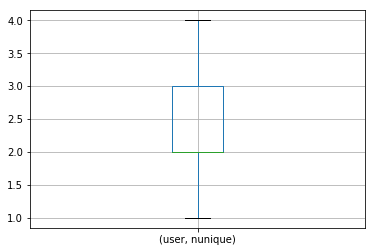

In [38]:
_=pd.DataFrame(task4_nsgood).boxplot(showfliers=False)

In [39]:
# We also treat n>4 as outliners:

outliners = task4_nsgood[ task4_nsgood>4 ]
print('Proportion of outliner:', outliners.count() / task4_nsgood.count())
outliners.describe()

Proportion of outliner: user  nunique    0.08
dtype: float64


,user
,nunique
count,20.000000
mean,7.150000
std,3.587625
min,5.000000
25%,5.000000
50%,5.500000
75%,7.000000
max,19.000000


In [40]:
# What are these outliners in good articles
task4_m1_nsgood = pd.Series(articlestalk_nsgood.groupby('Article').agg('user').describe()['unique'])
task4_m1_nsgood[task4_m1_nsgood>4].sort_values()[::-1].head()

Article
Digital signal          19
Free software           12
Cut, copy, and paste    12
Flynn's taxonomy        10
Cybercrime               7
Name: unique, dtype: object

## Compare boxplots

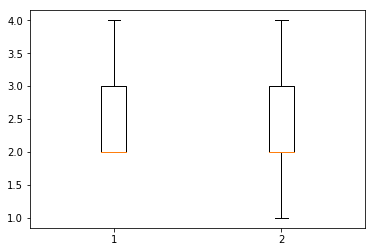

In [41]:
_=plt.boxplot([task4_m1_good, task4_m1_nsgood], showfliers=False)

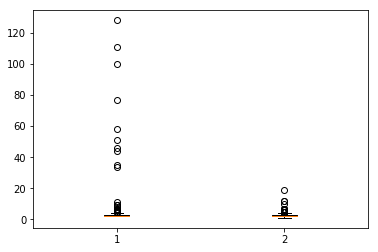

In [42]:
_=plt.boxplot([task4_m1_good, task4_m1_nsgood], showfliers=True)

## Conclusions:

Group of good article have more number of editors posting on talk-pages than the other group, which proves my original hypothesis that 
`Good articles have more editors posting on talk-pages than the not-so-good group articles`.

The result is quite similar to the [Aspect 4](#Aspect-4:-Number-of-editors-posting-on-talk-pages)

The outliners are also similar to the [Aspect 4](#Aspect-4:-Number-of-editors-posting-on-talk-pages), 
    that in both groups, outliners are articles in popular topics.

# Aspect 5: Frequency of edits (time between edits)

## My Hypothesis: 

**Good** articles have lower frequency of edits than the **not-so-good** articles

## Pre-processing of the timestamp data

In [43]:
task5_good = pd.DataFrame(articles_good.groupby('Article').agg('timestamp').unique())
task5_good_m = articles_good.groupby('Article').agg({'user': ['nunique']})
task5_good.head()

,timestamp
Article,
4chan,"[2018-11-18T11:21:12Z, 2018-11-18T06:09:03Z, 2..."
AACS encryption key controversy,"[2018-06-24T18:20:28Z, 2018-04-16T22:03:13Z, 2..."
AVG PC TuneUp,"[2017-11-10T11:47:34Z, 2017-11-10T10:01:50Z, 2..."
Acid2,"[2018-11-14T21:54:02Z, 2018-11-14T21:54:00Z, 2..."
Alan Kotok,"[2018-10-20T02:26:38Z, 2018-10-20T02:26:28Z, 2..."


In [44]:
one_article = task5_good.loc['4chan']
one_article.loc['timestamp']
time_series = pd.Series([pd.Timestamp(i) for i in one_article.loc['timestamp']])
time_series = time_series.sort_values()
time_series.diff().mean()

Timedelta('2 days 20:06:20.697937')

In [45]:
for index, row in task5_good.iterrows():
    print(row)
    print(row.name)
    break

timestamp    [2018-11-18T11:21:12Z, 2018-11-18T06:09:03Z, 2...
Name: 4chan, dtype: object
4chan


### Measurement that apply to each article

In [46]:
def measure_freq(article_name, df):
    one_article = df.loc[article_name]
    one_article.loc['timestamp']
    time_series = pd.Series([pd.Timestamp(i) for i in one_article.loc['timestamp']])
    time_series = time_series.sort_values()
    # time_series.diff().describe()
    return time_series.diff().astype('timedelta64[s]').mean()

In [47]:
task5_m1_good = pd.DataFrame([{"Article": row.name, 'mean_edit_timediff': measure_freq(row.name, task5_good)} for index, row in task5_good.iterrows()])

task5_nsgood = pd.DataFrame(articles_nsgood.groupby('Article').agg('timestamp').unique())
task5_m1_nsgood = pd.DataFrame([{"Article": row.name, 'mean_edit_timediff': measure_freq(row.name, task5_nsgood)} for index, row in task5_nsgood.iterrows()])

task5_m1_good.head()

,Article,mean_edit_timediff
0,4chan,2.451807e+05
1,AACS encryption key controversy,1.895115e+07
2,AVG PC TuneUp,6.864113e+06
3,Acid2,3.684713e+05
4,Alan Kotok,5.924646e+06


## Frequency of edits description:

In [48]:
print('Frequency of edits description (in second):\nGood\t|\tNot-So-Good')
pd.concat([task5_m1_good.describe(), task5_m1_nsgood.describe()], axis=1)

Frequency of edits description (in second):
Good	|	Not-So-Good


,mean_edit_timediff,mean_edit_timediff
count,1.520000e+02,2.500000e+02
mean,9.967647e+06,3.165624e+06
std,1.075210e+07,5.049724e+05
min,9.803746e+04,7.824103e+05
25%,2.856659e+06,2.915689e+06
50%,5.504580e+06,3.207897e+06
75%,1.443341e+07,3.446307e+06
max,4.889858e+07,4.441779e+06


## Check the outliners

### Good article

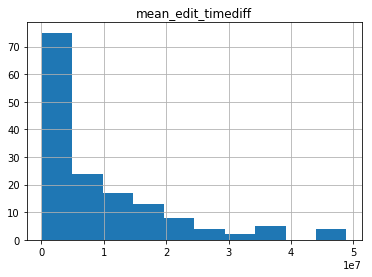

In [49]:
_=task5_m1_good.hist(column='mean_edit_timediff')

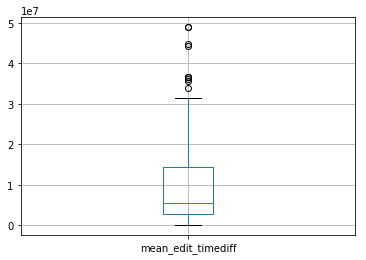

In [50]:
_=task5_m1_good.boxplot(column='mean_edit_timediff')

In [51]:
# We treat 1t_diff > 3.1 1e7` (seconds) as outliners:

outliners = task5_m1_good[ task5_m1_good>3.1*1e7 ]
outliners.describe()

,mean_edit_timediff
count,1.100000e+01
mean,3.947648e+07
std,6.098751e+06
min,3.157482e+07
25%,3.594868e+07
50%,3.666141e+07
75%,4.455724e+07
max,4.889858e+07


In [52]:
outliners.sort_values(by='mean_edit_timediff').head()

,Article,mean_edit_timediff
108,Randy Pausch,31574818.00
122,Slashdot,33881003.60
20,Code42,35629939.60
105,Python (programming language),36267430.25
150,ZX81,36643581.75


### Not-so-good article group

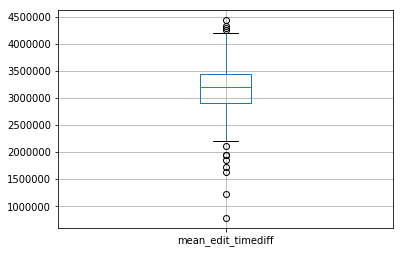

In [53]:
_=task5_m1_nsgood.boxplot(column='mean_edit_timediff')

In [54]:
# We treat 1t_diff >4e6` (seconds) as outliners:

outliners = task5_m1_nsgood[ task5_m1_nsgood>4e6 ]
outliners.describe()

,mean_edit_timediff
count,8.000000e+00
mean,4.227316e+06
std,1.330242e+05
min,4.066607e+06
25%,4.110354e+06
50%,4.234942e+06
75%,4.309641e+06
max,4.441779e+06


In [55]:
outliners.sort_values(by='mean_edit_timediff').head()

,Article,mean_edit_timediff
193,Linux kernel,4.066607e+06
171,Intel 80386,4.082619e+06
91,Cybercrime,4.119598e+06
160,IPv6,4.204394e+06
76,Computer network,4.265490e+06


## Again, let's compare with the other group

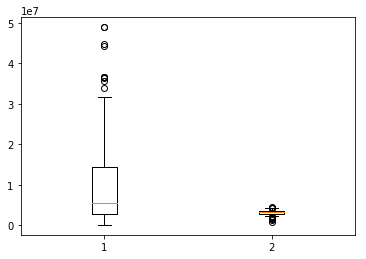

In [56]:
_=plt.boxplot([task5_m1_good['mean_edit_timediff'], task5_m1_nsgood['mean_edit_timediff']])

## Conclusions:

The good-article group has larger frequency of edit than the not-so-good articles, which invalid my original hypothesis that
`Good articles have lower frequency of edits than the not-so-good articles`

The outliners of both group are articles that relatively old or not so popular (that's why they have lower editting frequency), e.g. 
[Randy Pausch](https://en.wikipedia.org/wiki/Randy_Pausch), [Intel 80386](https://en.wikipedia.org/wiki/Intel_80386) and [Linux kernel](https://en.wikipedia.org/wiki/Linux kernel)